In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
!pip install mlxtend


In [3]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
data = '/content/online_retail.csv'
df = pd.read_csv(data)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
127894,127894,547248,85213,MINI ZINC GARDEN DECORATIONS,3.0,3/22/2011 9:23,1.63,NaN,United Kingdom
127895,127895,547248,90000B,MIDNIGHT BLUE COPPER FLOWER NECKLAC,1.0,3/22/2011 9:23,6.23,NaN,United Kingdom
127896,127896,547248,90013A,MIDNIGHT BLUE VINTAGE EARRINGS,2.0,3/22/2011 9:23,3.73,NaN,United Kingdom
127897,127897,547248,90013D,PURPLE VINTAGE EARRINGS,2.0,3/22/2011 9:23,4.15,NaN,United Kingdom
127898,127898,547248,90014A,SILVER/MOP ORBIT,NaN,NaN,NaN,NaN,NaN


In [7]:
df_clean = df.dropna(how='any')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df_clean.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df_clean.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Quantity,UnitPrice,CustomerID
count,127899.000000,127898.000000,127898.000000,86601.000000
mean,63949.000000,8.902915,5.257966,15305.902657
std,36921.405377,298.772025,110.081982,1739.435914
min,0.000000,-74215.000000,0.000000,12346.000000
25%,31974.500000,1.000000,1.250000,13908.000000
50%,63949.000000,3.000000,2.460000,15222.000000
75%,95923.500000,10.000000,4.210000,16897.000000
max,127898.000000,74215.000000,16888.020000,18283.000000


In [11]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(127899, 9)

In [12]:
df_clean.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(86601, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127899 entries, 0 to 127898
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        127899 non-null  int64  
 1   InvoiceNo    127899 non-null  object 
 2   StockCode    127899 non-null  object 
 3   Description  127554 non-null  object 
 4   Quantity     127898 non-null  float64
 5   InvoiceDate  127898 non-null  object 
 6   UnitPrice    127898 non-null  float64
 7   CustomerID   86601 non-null   float64
 8   Country      127898 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 8.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86601 entries, 0 to 127738
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        86601 non-null  int64  
 1   InvoiceNo    86601 non-null  object 
 2   StockCode    86601 non-null  object 
 3   Description  86601 non-null  object 
 4   Quantity     86601 non-null  float64
 5   InvoiceDate  86601 non-null  object 
 6   UnitPrice    86601 non-null  float64
 7   CustomerID   86601 non-null  float64
 8   Country      86601 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 8.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Convert the data into the basket format (pivot table)
basket = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0)

# Convert quantities to 1/0 for one-hot encoding
basket = basket.set_index('InvoiceNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-a91d26f74c18>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [16]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


# Filter rules by confidence (for example, confidence > 0.7)
filtered_rules = rules[rules['confidence'] > 0.7]

# Filter rules by lift (for example, lift > 1.2)
filtered_rules_lift = rules[rules['lift'] > 1.2]

# Display filtered rules
print(filtered_rules.head())
print(filtered_rules_lift.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


   antecedents consequents  antecedent support  consequent support   support  \
12     (22697)     (22699)            0.044190            0.043699  0.032733   
13     (22699)     (22697)            0.043699            0.044190  0.032733   
17     (22804)    (85123A)            0.029951            0.106219  0.021604   

    confidence       lift  leverage  conviction  zhangs_metric  
12    0.740741  16.951033  0.030802    3.688590       0.984512  
13    0.749064  16.951033  0.030802    3.808975       0.984007  
17    0.721311   6.790775  0.018423    3.207095       0.879070  
  antecedents consequents  antecedent support  consequent support   support  \
0     (20713)    (85099B)            0.036498            0.076268  0.022913   
1     (21977)     (21212)            0.037152            0.056792  0.020622   
2     (84991)     (21212)            0.036170            0.056792  0.021277   
3     (21733)    (85123A)            0.042062            0.106219  0.028314   
4     (21928)    (85099B

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


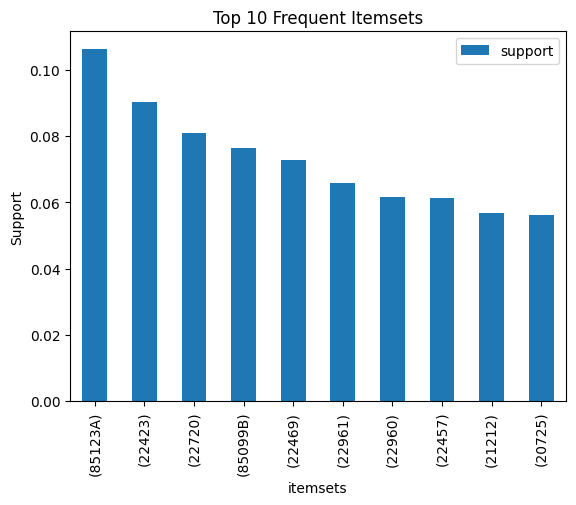

In [17]:
import matplotlib.pyplot as plt

# Plot the top 10 most frequent itemsets
frequent_itemsets.sort_values(by='support', ascending=False).head(10).plot(kind='bar', x='itemsets', y='support')
plt.title('Top 10 Frequent Itemsets')
plt.ylabel('Support')
plt.show()


In [18]:
# Display a sample of StockCode and Description to check which products they refer to
df_clean[['StockCode', 'Description']].drop_duplicates().head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
5,22752,SET 7 BABUSHKA NESTING BOXES
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT
9,84879,ASSORTED COLOUR BIRD ORNAMENT


**Key Terminology for the Rules:**


**Antecedent**: The item or items that must be present for the rule to apply (e.g., buying item A).

**Consequent**: The item or items that are likely to be purchased once the antecedent is purchased (e.g., if item A is bought, then item B is likely to be bought too).

**Support**: The proportion of transactions in the dataset that contain both the antecedent and the consequent. It shows how frequently an itemset appears in the dataset.

**Confidence**: The likelihood that a customer will buy the consequent if they have already bought the antecedent. It is calculated as:

Confidence
(
𝐴
⇒
𝐵
)
=
Support
(
𝐴
∪
𝐵
)/
Support
(
𝐴
)


**Lift**: This measures how much more likely the consequent is purchased when the antecedent is purchased, compared to the likelihood of purchasing the consequent independently. A lift > 1 means the rule is significant.

In [19]:
print(rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0     (20713)    (85099B)            0.036498            0.076268  0.022913   
1     (21977)     (21212)            0.037152            0.056792  0.020622   
2     (84991)     (21212)            0.036170            0.056792  0.021277   
3     (21733)    (85123A)            0.042062            0.106219  0.028314   
4     (21928)    (85099B)            0.030769            0.076268  0.020949   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.627803   8.231490  0.020130    2.481833       0.911794  
1    0.555066   9.773642  0.018512    2.119883       0.932322  
2    0.588235  10.357688  0.019222    2.290648       0.937358  
3    0.673152   6.337376  0.023846    2.734543       0.879187  
4    0.680851   8.927039  0.018603    2.894359       0.916171  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
print(frequent_itemsets)

      support          itemsets
0    0.020949          (15056N)
1    0.022422           (20676)
2    0.039444           (20685)
3    0.022750           (20711)
4    0.030115           (20712)
..        ...               ...
235  0.024714   (82482, 82494L)
236  0.020458  (82494L, 85123A)
237  0.025368  (85099C, 85099B)
238  0.020622  (85099F, 85099B)
239  0.022259     (DOT, 85099B)

[240 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Check StockCode to Description mapping
df_clean[['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[['20712', '85099B']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description
StockCode,
20712,JUMBO BAG WOODLAND ANIMALS
85099B,JUMBO BAG RED RETROSPOT


**Example of Generated Rules:**
Based on our results, we have rules like:

| Antecedent |	Consequent |	Support |	Confidence |	Lift |

(20712) (85099B)0.0206	61.99%	7.68

(22356)	(20724)	0.0201	70.26%	17.60

(20726)	(20725)	0.0203	51.67%	8.55

(85099C)	(85099B)	0.0226	62.70%	7.76


**In these rules:**

(**20712**) => (**85099B**) means that 61.99% of the transactions with 20712 also had **85099B**.
A lift of 7.68 means that the purchase of **85099B** is 7.68 times more likely when 20712 is purchased compared to when 20712 is not purchased.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Filter rules with high confidence and lift
strong_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.5)]
print(strong_rules)

   antecedents consequents  antecedent support  consequent support   support  \
0      (20713)    (85099B)            0.036498            0.076268  0.022913   
3      (21733)    (85123A)            0.042062            0.106219  0.028314   
4      (21928)    (85099B)            0.030769            0.076268  0.020949   
6      (22386)    (85099B)            0.043372            0.076268  0.028151   
9      (22470)     (22469)            0.055319            0.072831  0.034861   
12     (22697)     (22699)            0.044190            0.043699  0.032733   
13     (22699)     (22697)            0.043699            0.044190  0.032733   
14     (22722)     (22720)            0.054992            0.081015  0.036825   
15     (22727)     (22726)            0.040589            0.042226  0.027823   
16     (22726)     (22727)            0.042226            0.040589  0.027823   
17     (22804)    (85123A)            0.029951            0.106219  0.021604   
21    (85099C)    (85099B)            0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Sort rules by lift and display top 5
top_lift_rules = strong_rules.sort_values(by='lift', ascending=False).head(5)
print(top_lift_rules)


   antecedents consequents  antecedent support  consequent support   support  \
12     (22697)     (22699)            0.044190            0.043699  0.032733   
13     (22699)     (22697)            0.043699            0.044190  0.032733   
15     (22727)     (22726)            0.040589            0.042226  0.027823   
16     (22726)     (22727)            0.042226            0.040589  0.027823   
4      (21928)    (85099B)            0.030769            0.076268  0.020949   

    confidence       lift  leverage  conviction  zhangs_metric  
12    0.740741  16.951033  0.030802    3.688590       0.984512  
13    0.749064  16.951033  0.030802    3.808975       0.984007  
15    0.685484  16.233746  0.026109    3.045231       0.978100  
16    0.658915  16.233746  0.026109    2.812818       0.979772  
4     0.680851   8.927039  0.018603    2.894359       0.916171  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Filter rules where '85099B' is in consequents
rules_85099B = strong_rules[strong_rules['consequents'].apply(lambda x: '85099B' in x)]
print(rules_85099B)


   antecedents consequents  antecedent support  consequent support   support  \
0      (20713)    (85099B)            0.036498            0.076268  0.022913   
4      (21928)    (85099B)            0.030769            0.076268  0.020949   
6      (22386)    (85099B)            0.043372            0.076268  0.028151   
21    (85099C)    (85099B)            0.038625            0.076268  0.025368   
22    (85099F)    (85099B)            0.033061            0.076268  0.020622   
23       (DOT)    (85099B)            0.034370            0.076268  0.022259   

    confidence      lift  leverage  conviction  zhangs_metric  
0     0.627803  8.231490  0.020130    2.481833       0.911794  
4     0.680851  8.927039  0.018603    2.894359       0.916171  
6     0.649057  8.510163  0.024843    2.632138       0.922504  
21    0.656780  8.611424  0.022422    2.691366       0.919387  
22    0.623762  8.178515  0.018100    2.455181       0.907739  
23    0.647619  8.491314  0.019637    2.621400       0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


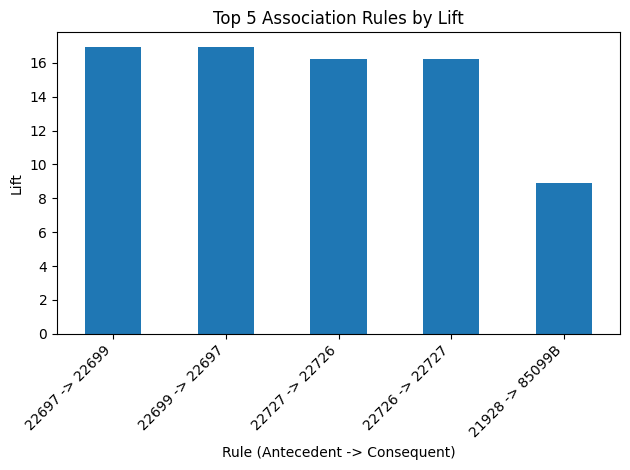

In [29]:
# Combine antecedents and consequents into a single column for plotting
top_lift_rules['rule'] = top_lift_rules['antecedents'].apply(lambda x: ','.join(list(x))) + ' -> ' + top_lift_rules['consequents'].apply(lambda x: ','.join(list(x)))

# Plot top 5 rules by lift
top_lift_rules[['rule', 'lift']].plot(kind='bar', x='rule', y='lift', legend=False)
plt.title('Top 5 Association Rules by Lift')
plt.xlabel('Rule (Antecedent -> Consequent)')
plt.ylabel('Lift')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


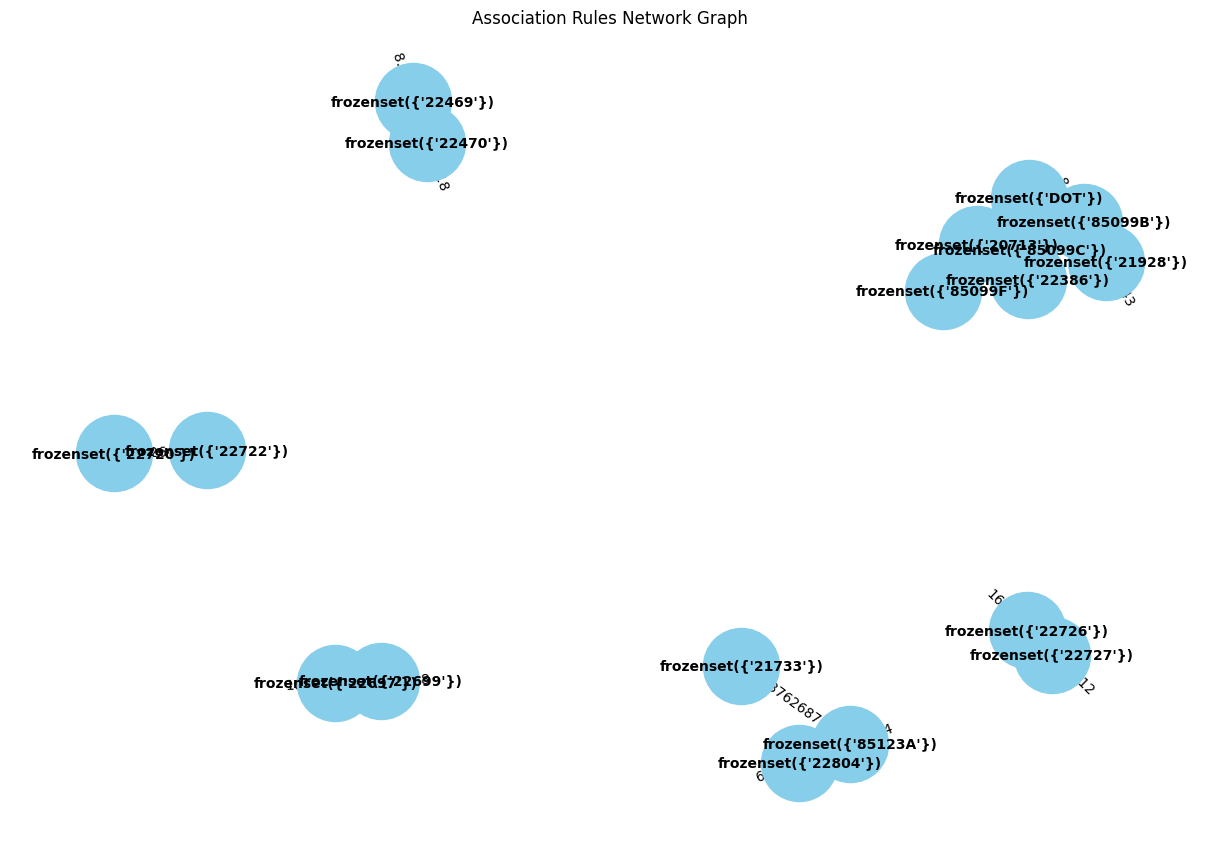

In [43]:
import networkx as nx

# Create network graph for association rules
G = nx.from_pandas_edgelist(
    strong_rules, source='antecedents', target='consequents',
    edge_attr=['lift', 'confidence'], create_using=nx.DiGraph()
)

# Plot the graph
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Association Rules Network Graph')
plt.show()
